## CUNY MSDA Fall 2017 Semester
### DATA 620
### Week 8 Homework Assigment: High Frequency Words
By Dmitriy Vecheruk

### Assignment

1. Choose a corpus of interest.  
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).  
3. Taking the most common words, how many unique words represent half of the total words in the corpus?  
4. Identify the 200 highest frequency words in this corpus.  
5. Create a graph that shows the relative frequency of these 200 words.  
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.  
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”  

----
### Solution

*1.Choose a corpus of interest.*  
  
For this assignment, I will use the famous Reuters news corpus. This corpus is contained in the `nltk` package and can be downloaded using the `nltk.download()` function

In [109]:
import nltk
import string
from nltk.corpus import reuters
from nltk import FreqDist
import matplotlib.pyplot as plt

%matplotlib inline

*2.How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).*  

In order to count unique words, the following approach will be applied:  
1) Remove all numbers and punctuation as these are not words  
2) Filter all unique word types from the corpus  
3) Lowercase and stem the word types to avoid counting word forms (e.g. go, goes) as unique words  
3) Count the number of remaining unique stemmed tokens  

In [4]:
all_words = reuters.words()
all_words[10:30]

[u'RIFT',
 u'Mounting',
 u'trade',
 u'friction',
 u'between',
 u'the',
 u'U',
 u'.',
 u'S',
 u'.',
 u'And',
 u'Japan',
 u'has',
 u'raised',
 u'fears',
 u'among',
 u'many',
 u'of',
 u'Asia',
 u"'"]

In [5]:
all_words = [item for item in all_words if not any(c.isdigit() for c in item)]
all_words = [item for item in all_words if not all(c in string.punctuation for c in item)]
all_words = [item for item in all_words if not all(c in string.uppercase for c in item)] # exclude abbreviations
all_words[10:30]

[u'among',
 u'many',
 u'of',
 u'Asia',
 u's',
 u'exporting',
 u'nations',
 u'that',
 u'the',
 u'row',
 u'could',
 u'inflict',
 u'far',
 u'reaching',
 u'economic',
 u'damage',
 u'businessmen',
 u'and',
 u'officials',
 u'said']

In [17]:
total_words = len(all_words)
unique_types = set(all_words)

In [18]:
len_uq_types = len(unique_types)

In [31]:
porter = nltk.PorterStemmer()

unique_tokens_stemmed = [porter.stem(item) for item in unique_tokens_stemmed]
unique_tokens_stemmed = set(unique_tokens_stemmed)
unique_tokens_stemmed = list(unique_tokens_stemmed)
unique_tokens_stemmed[10:30]

[u'travaux',
 u'suzann',
 u'demopoli',
 u'repetit',
 u'sation',
 u'sesostri',
 u'midafternoon',
 u'friesian',
 u'authoris',
 u'reshuffl',
 u'chanthaburi',
 u'houtt',
 u'itaqui',
 u'lorn',
 u'diver',
 u'ranasingh',
 u'hermann',
 u'lord',
 u'shipmetn',
 u'undersecretari']

In [32]:
len_uq_tokens_st = len(unique_tokens_stemmed)

print("""
Total words in corpus: {}
Unique types: {}
Unique stemmed words: {}

""".format(total_words,len_uq_types,len_uq_tokens_st))


Total words in corpus: 1212753
Unique types: 27792
Unique stemmed words: 17023




We see that from a total count of **over 1.2 mln. words**, there are only **17 thousand unique words** after the stemming.

*3.Taking the most common words, how many unique words represent half of the total words in the corpus?*
  
To answer this question, I will construct the word frequency destribution and use it to make a cumulative frequency calculation starting with the most frequent words.

In [34]:
# lowercase before counting the frequency
all_words = [item.lower() for item in all_words ]
fdist = FreqDist(all_words) 

In [35]:
for item in fdist.most_common(50): print item,

(u'the', 69220) (u'of', 36029) (u'to', 34143) (u'in', 27957) (u'and', 25271) (u'said', 25233) (u'a', 23492) (u'mln', 18043) (u'vs', 14120) (u'for', 13033) (u'dlrs', 11891) (u'it', 10902) (u's', 9298) (u'pct', 9093) (u'on', 8787) (u'lt', 8695) (u'from', 8009) (u'cts', 7956) (u'is', 7610) (u'that', 7534) (u'its', 7356) (u'year', 6983) (u'by', 6923) (u'at', 6765) (u'be', 6289) (u'with', 6027) (u'will', 5874) (u'was', 5802) (u'billion', 5656) (u'net', 5431) (u'he', 5174) (u'has', 4704) (u'would', 4658) (u'company', 4611) (u'an', 4540) (u'loss', 4537) (u'as', 4485) (u'not', 4273) (u'shr', 3977) (u'which', 3666) (u'but', 3586) (u'this', 3479) (u'or', 3223) (u'last', 3221) (u'are', 3208) (u'bank', 3190) (u'were', 3086) (u'have', 3072) (u'share', 3056) (u'had', 2958)


We can see that - as expected - the most frequent words are prepositions, articles, and some terms that are frequently used in business news, such as "mln", "billion", "company".

In [63]:
total_cnt = sum(fdist.values())
median = round(total_cnt/2)
top_100 = fdist.most_common(100)


cumul_fr = 0.0
counter = 0

for item in top_100:
    if cumul_fr < median:
        cumul_fr = cumul_fr + item[1]
        counter += 1
    else: 
        break

print counter, item, cumul_fr, median

94 (u'co', 1515) 607221.0 606376.0


We see that **95 of the most common words** represent 50% of the total word count.

*4.Identify the 200 highest frequency words in this corpus.  
5.Create a graph that shows the relative frequency of these 200 words.  
6.Does the observed relative frequency of these words follow Zipf’s law? Explain.  
7.In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”*

We get the top 200 words by frequency and construct an array holding their relative frequencies, as well as their frequencies if they were to follow Zipf's law:  
so the frequency of the most frequent word remains the same, the frequency of the second is 1/2 of that of the first one, 1/3 for the third one and so on.


In [150]:
top_200 = fdist.most_common(200)

cumul_fr = 0.0
counter = 1
word_freqs = []
top_freq = 1.0*top_200[0][1]/total_cnt # the relative frequency of the top word

for item in top_200:
    cumul_fr = cumul_fr + item[1]
    word_freqs.append([item[0],item[1],
                       1.0*item[1]/total_cnt, # relative freq
                       1.0*top_freq/counter, # Zipf law theoretical freq
                       cumul_fr])
    counter +=1

In [151]:
top_freq

0.05707675017089218

In [152]:
print word_freqs[0],'\n',word_freqs[199]

[u'the', 69220, 0.05707675017089218, 0.05707675017089218, 69220.0] 
[u'shareholders', 804, 0.0006629544515659825, 0.0002853837508544609, 718477.0]


In [153]:
word_freqs[199]
top_200_words = [item[0] for item in word_freqs]
top_200_fr = [item[2] for item in word_freqs]
top_200_zipf = [item[3] for item in word_freqs]

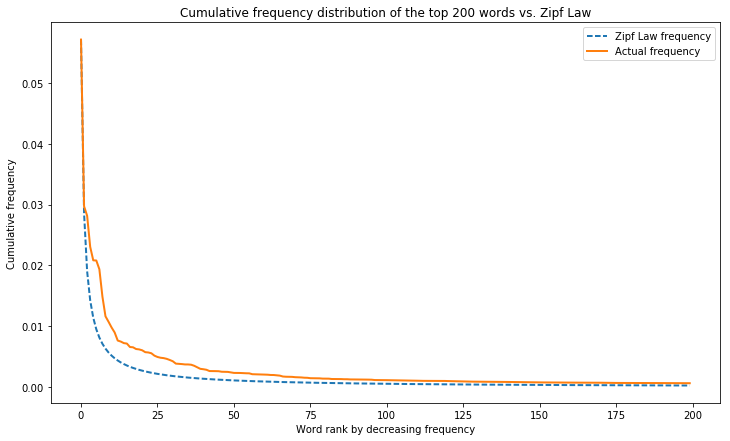

In [173]:

fig, ax = plt.subplots(1,1,figsize=(12, 7))

ax.plot(range(0,200),top_200_zipf,'--',linewidth=2,label="Zipf Law frequency")
ax.plot(range(0,200),top_200_fr,linewidth=2,label="Actual frequency")
ax.set(xlabel='Word rank by decreasing frequency', ylabel='Cumulative frequency',
       title='Cumulative frequency distribution of the top 200 words vs. Zipf Law')
ax.legend()
plt.show()


The **top 200 most frequent words** are:

In [169]:
for item in top_200_words: print item,

the of to in and said a mln vs for dlrs it s pct on lt from cts is that its year by at be with will was billion net he has would company an loss as not shr which but this or last are bank were have share had one oil profit inc about trade they market shares also two new corp stock tonnes revs sales up per been prices april after may march more group quarter than price first government february other rate january japan we three if week exchange offer dollar co agreement could against told production over tax some today no foreign their expected interest total under there rose month all five current international nine record rates ltd dlr end six rise exports increase added oper board stg earlier world avg because shrs between meeting common growth official industry months earnings into made economic spokesman department export officials major banks four cash countries while now december any analysts when japanese sale west agreed pay mths investment operations imports report sources bus

The observed relative frequency of these words generally follows Zipf's law. However, some words within the top 50 by frequency appear more often than would be expected in a theoretical Zipf law distribution. These words are: 

In [174]:
for item in top_200_words[:49]: print item,

the of to in and said a mln vs for dlrs it s pct on lt from cts is that its year by at be with will was billion net he has would company an loss as not shr which but this or last are bank were have share


It is clear that these terms are bound to be more frequent in the Reuters news corpus, as in the general corpus of the language, as they describe business terms that tend to appear in news coverage.

### Reference

1. Bird S., Klein E., Loper E. (2009). Natural Language Processing with Python: Analyzing Text with the Natural Language Toolkit  
2. [Stackoverflow: Remove strings from a list that contains numbers in python](https://stackoverflow.com/a/16084700/8066374)
3. [Matplotlib: Categorical Variables](https://matplotlib.org/devdocs/gallery/lines_bars_and_markers/categorical_variables.html)